# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

**Фронт работы:**
1. Подготовить данные:
- Открыть файлы и изучить их.
- Проверить, что эффективность обогащения рассчитана правильно. Вычислить её на обучающей выборке для признака `rougher.output.recovery`. Найти MAE между расчётами и значением признака.
- Проанализировать признаки, недоступные в тестовой выборке.
- Провести предобработку данных.
2. Проанализировать данные:
- Посмотреть, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
- Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
- Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 
3. Построить модель:
- Написать функцию для вычисления итоговой sMAPE.
- Обучить разные модели и выбрать лучшую модель, а также проверить её на тестовой выборке.

## Подготовка данных

### Открытие и изучение файлов

In [1]:
#Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
#Запишем данные в переменные
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

#Изучим данные
display(df_train.head())
display(df_test.head())
display(df_full.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
#Изучим общую информацию об обучающей выборке
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [4]:
#Изучим общую информацию о тестовой выборке
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [5]:
#Изучим общую информацию об исходном датафрейме
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [6]:
#Проверяем наличие дубликатов
display(df_train.duplicated().sum())
display(df_test.duplicated().sum())
display(df_full.duplicated().sum())

0

0

0

### Расчет эффективности обогащения

Эффективность обогащения рассчитывается по формуле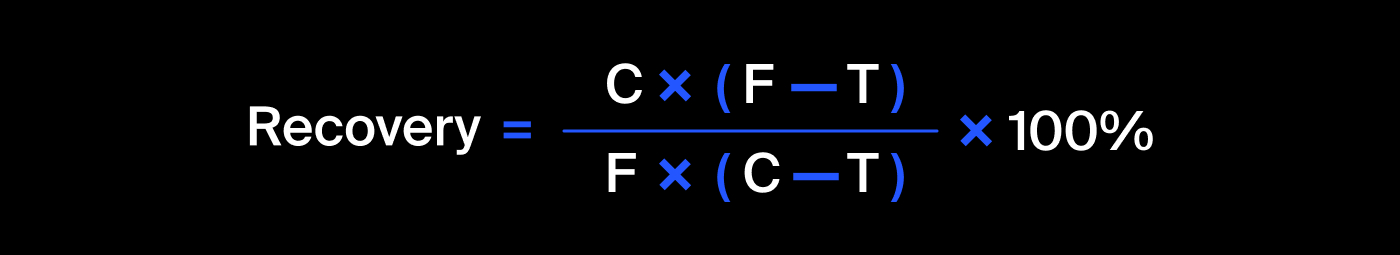
- C — доля золота в концентрате после флотации/очистки
- F — доля золота в сырье/концентрате до флотации/очистки
- T — доля золота в отвальных хвостах после флотации/очистки

Вычислим эффективность обогащения на обучающей выборке для признака `rougher.output.recovery`, проверим, что она рассчитана правильно.

In [7]:
#Задаем значения переменных
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

#Считаем
recovery = ((C * (F - T)) / (F * (C - T)) * 100)
#Проверяем
mean_absolute_error(df_train['rougher.output.recovery'], recovery)

9.73512347450521e-15

Мы получили ничтожно малое значение MAE, что говорит о том, что эффективность обогащения рассчитана верно — значения совпадают.

### Анализ признаков, недоступных в `df_test`

In [8]:
#Вспоминаем количество столбцов
print(df_train.shape)
df_test.shape

(14149, 86)


(5290, 52)

In [9]:
#Считаем разницу в количестве и смотрим названия
difference = set(df_train.columns) - set(df_test.columns)
print(len(difference))
difference

34


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Мы видим, что в тестовой выборке нет столбцов с информацией о концентрации различных элементов на каждом этапе, об отвальных хвостах на каждом этапе, а также о таргетных показателях *recovery*, что логично. Необходимо будет удалить из тренировочной выборки столбцы, отсутствующие в тестовой выборке, он не будут участвовать в обучении.

### Предобработка данных

In [10]:
#Запишем таргетные значения в df_test
df_test['rougher.output.recovery'] = df_full['rougher.output.recovery']
df_test['final.output.recovery'] = df_full['final.output.recovery']

In [11]:
#Удаляем столбцы из тренировочной выборки
df_train = df_train[df_test.columns]

#Проверяем
print(df_train.shape)
df_test.shape

(14149, 54)


(5290, 54)

In [16]:
#Заполняем строки с пропусками в данных
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

С предобработкой закончили, можно приступать к анализу.

## Анализ данных

### Изменение концентрации на разных этапах

In [17]:
#Пишем функцию для графиков
def concentration(df, metal):
    df.plot.hist(bins=150, alpha=0.5)
    sns.set(rc={'figure.figsize':(13,8)})
    plt.title(f'Концентрация {metals[metal]} на 4 этапах очистки')
    plt.legend([
        'Сырье',
        'Черновой концентрат',
        'Первичная очистка',
        'Финальный концентрат'
    ])
    plt.show()

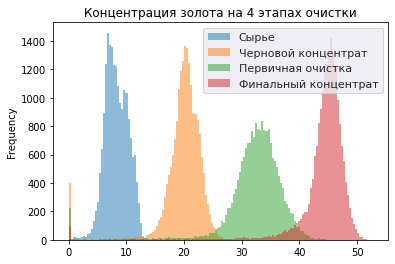

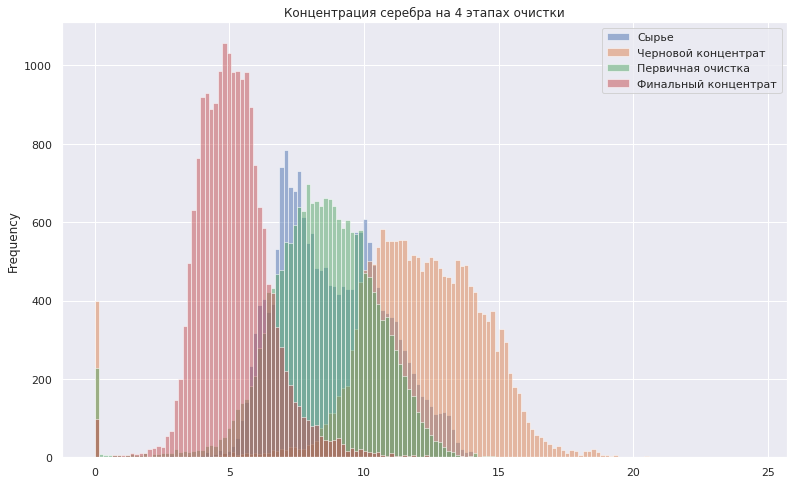

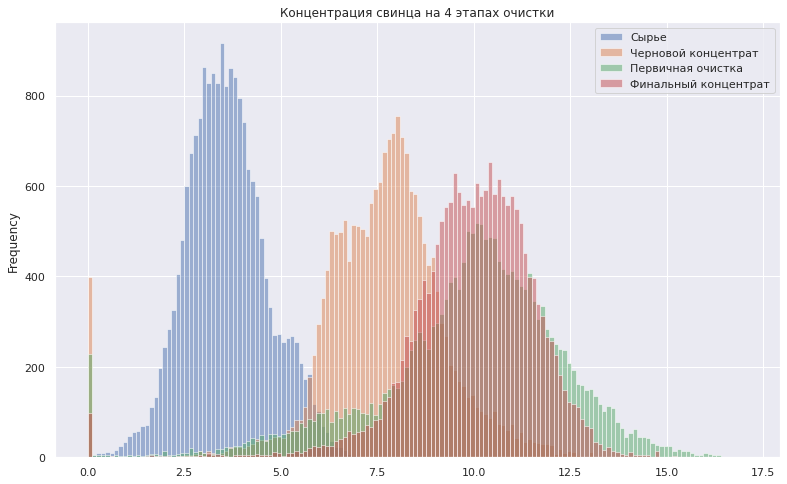

In [18]:
#Строим графики для каждого металла
metals = {'au':'золота', 'ag':'серебра', 'pb':'свинца'}
stages = ['rougher.input.feed_',
          'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_']

for metal in metals:
    stage_metal = []
    for stage in stages:
        stage_metal.append(stage+metal)
    concentration(df_full[stage_metal], metal)      

- Концентрация золота увеличивается
- Концентрация серебра уменьшается
- Концентрация свинца сперва увеличивается, затем остается на примерно одном уровне
- На всех графиках видны выбросы в районе нуля

###  Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


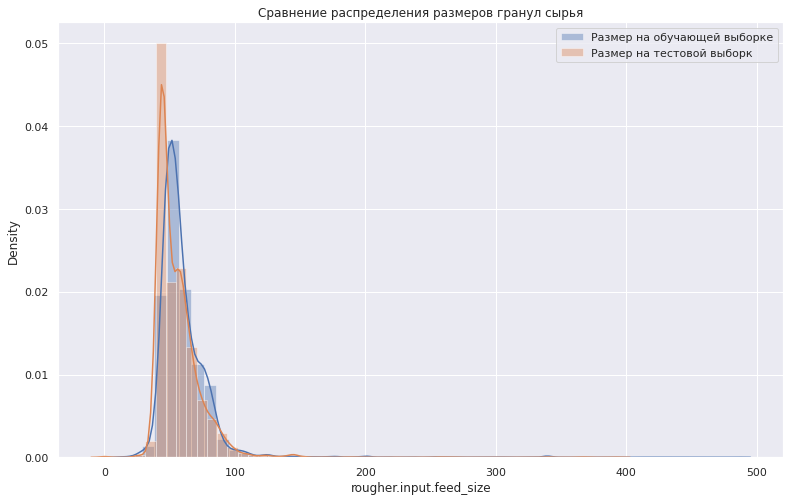

In [19]:
#Строим график
sns.distplot(
    df_train['rougher.input.feed_size'],
    label='Размер на обучающей выборке'
)
sns.distplot(
    df_test['rougher.input.feed_size'],
    label='Размер на тестовой выборк'
)
plt.title('Сравнение распределения размеров гранул сырья')
plt.legend()
plt.show()

Как видим, размеры гранул различаются несущественно. Идем дальше.

### Суммарная концентрация веществ на разных стадиях

In [20]:
#Задаем переменные для графика
rougher_feed = df_full['rougher.input.feed_au'] + \
               df_full['rougher.input.feed_pb'] + \
               df_full['rougher.input.feed_sol'] + \
               df_full['rougher.input.feed_ag']
               
rougher_concentrate = df_full['rougher.output.concentrate_au'] + \
                      df_full['rougher.output.concentrate_pb'] + \
                      df_full['rougher.output.concentrate_sol'] + \
                      df_full['rougher.output.concentrate_ag']
                     
final_concentrate = df_full['final.output.concentrate_au'] + \
                    df_full['final.output.concentrate_pb'] + \
                    df_full['final.output.concentrate_sol'] + \
                    df_full['final.output.concentrate_ag']

#Пригодится позже
primary_cleaner_concentrate = df_full['primary_cleaner.output.concentrate_au'] + \
               df_full['primary_cleaner.output.concentrate_pb'] + \
               df_full['primary_cleaner.output.concentrate_sol'] + \
               df_full['primary_cleaner.output.concentrate_ag']

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

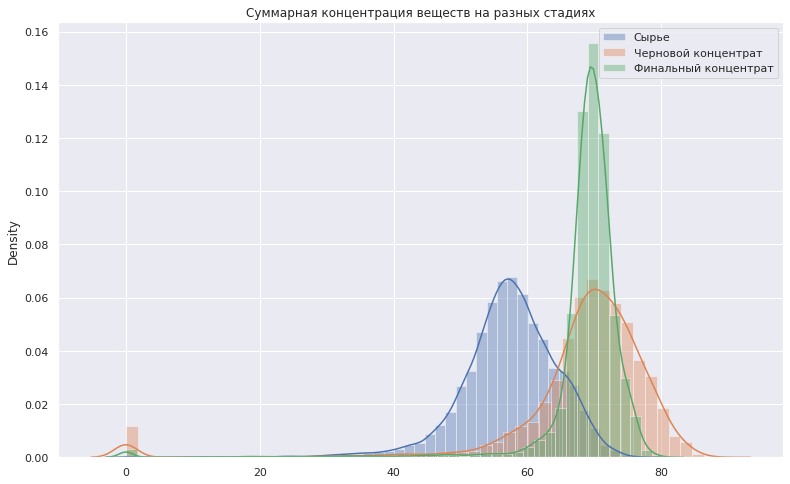

In [21]:
#Строим график
sns.distplot(rougher_feed, label='Сырье')
sns.distplot(rougher_concentrate, label='Черновой концентрат')
sns.distplot(final_concentrate, label='Финальный концентрат')
plt.title('Суммарная концентрация веществ на разных стадиях')
plt.legend()
plt.show()

Концентрация веществ растет с каждым этапом, а значит эффективна. Тем не менее, информация о нулевых показателях концентрации сразу по всем веществам — явная ошибка, её надо удалить, т.к. такие данные только ухудшат работу модели.

In [22]:
#Удалим нулевые выбросы
print(df_full.shape)
df_full = df_full.query('@rougher_feed > 1 & \
                        @rougher_concentrate > 1 & \
                        @final_concentrate > 1 & \
                        @primary_cleaner_concentrate > 1'
)

#Проверяем
print(df_full.shape)

(19439, 86)
(18082, 86)


In [23]:
#Очистим от нулевых выбросов df_train и df_test
print(df_train.shape)
print(df_test.shape)

index_train_full = df_train.index.intersection(df_full.index)
index_test_full = df_test.index.intersection(df_full.index)
df_train = df_train.loc[index_train_full]
df_test = df_test.loc[index_test_full]

#Проверяем
print(df_train.shape)
print(df_test.shape)

(14149, 54)
(5290, 54)
(13042, 54)
(5040, 54)


Задачи по анализу выполнены, выборки очищены от нулевых выбросов, можно приступать к написанию моделей.

## Модель

### Функция для вычисления итоговой sMAPE

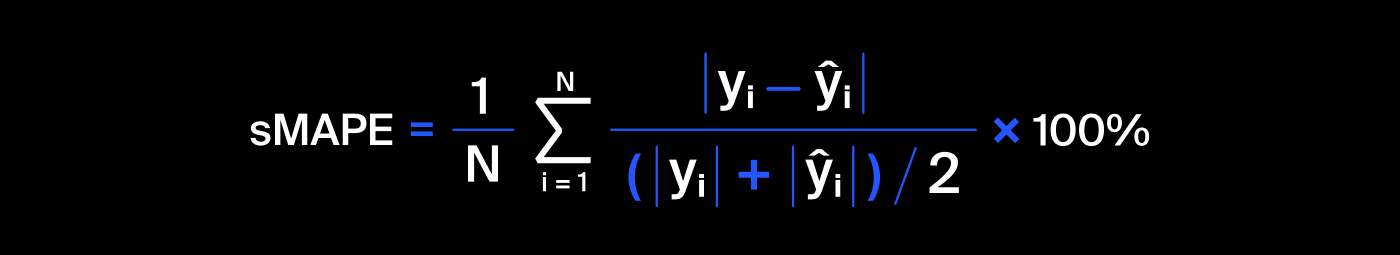

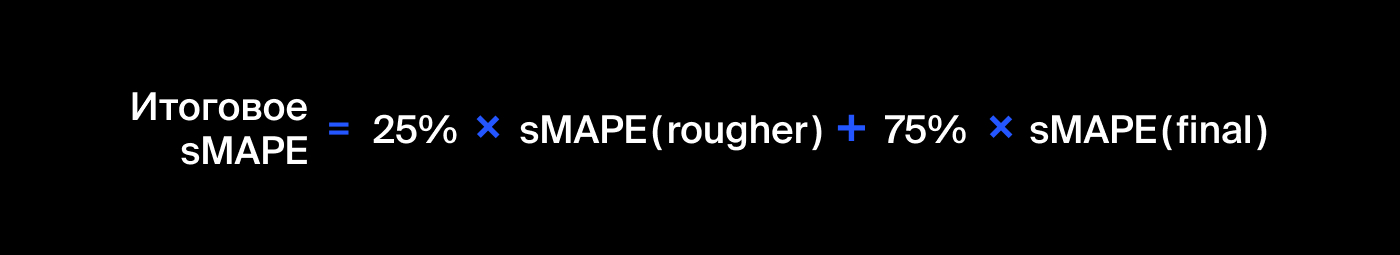

In [24]:
#Функция для расчета sMAPE
def smape(target, prediction):
    return 1 / len(target) * sum(abs(target - prediction) / ((abs(target) + abs(prediction)) / 2)) * 100

In [25]:
#Функция для расчета итогового sMAPE
def total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Обучение моделей и оценка качества

In [26]:
#Зададим переменные для признаков и целевых значений
features_train = df_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']

features_test = df_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_rougher_test = df_test['rougher.output.recovery']
target_final_test = df_test['final.output.recovery']

#Проверяем
print(features_train.shape)
print(target_rougher_train.shape)
print(target_final_train.shape)
print(features_test.shape)
print(target_rougher_test.shape)
print(target_final_test.shape)

(13042, 52)
(13042,)
(13042,)
(5040, 52)
(5040,)
(5040,)


In [27]:
#Добавим total_smape_score для параметров GridSearchCV
smape_score = make_scorer(
    smape,
    greater_is_better=False
)

total_smape_score = make_scorer(
    total_smape,
    greater_is_better=False
)

In [28]:
#Масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_train)

features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

#### RandomForestRegressor

In [31]:
#Пишем модель RandomForestRegressor
forest = RandomForestRegressor(random_state=12345)
forest_params = {'n_estimators': [10, 50, 100],
             'max_depth': [None, 5, 10]}

forest_grid_rougher = GridSearchCV(
    forest,
    forest_params,
    cv=5,
    scoring=smape_score)
forest_grid_final = GridSearchCV(
    forest,
    forest_params,
    cv=5,
    scoring=smape_score)

forest_grid_rougher.fit(features_train_scaled, target_rougher_train)
forest_grid_final.fit(features_train_scaled, target_final_train)

print(forest_grid_rougher.best_score_)
print(forest_grid_final.best_score_)
print('Итоговое sMAPE RandomForestRegressor на тренировочной выборке: {}'.format(
    total_smape(
        forest_grid_rougher.best_score_,
        forest_grid_final.best_score_)))

-7.164210591579229
-8.076702472563229
Итоговое sMAPE RandomForestRegressor на тренировочной выборке: -7.848579502317229


#### LinearRegression

In [29]:
#Пишем модель LinearRegression
regression = LinearRegression()
regression_params = {'normalize': [True, False]}

regression_grid_rougher = GridSearchCV(
    regression,
    regression_params,
    cv=5,
    scoring=smape_score)
regression_grid_final = GridSearchCV(
    regression,
    regression_params,
    cv=5,
    scoring=smape_score)

regression_grid_rougher.fit(features_train_scaled, target_rougher_train)
regression_grid_final.fit(features_train_scaled, target_final_train)

print(regression_grid_rougher.best_score_)
print(regression_grid_final.best_score_)
print('Итоговое sMAPE LinearRegression на тренировочной выборке: {}'.format(
    total_smape(
        regression_grid_rougher.best_score_,
        regression_grid_final.best_score_)))

-6.963386038543807
-10.08616715390412
Итоговое sMAPE LinearRegression на тренировочной выборке: -9.305471875064041


#### Lasso

In [30]:
#Пишем модель Lasso
lasso = Lasso(random_state=12345)
lasso_params = {'alpha': [0.1, 1, 10]}

lasso_grid_rougher = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring=smape_score)
lasso_grid_final = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring=smape_score)

lasso_grid_rougher.fit(features_train_scaled, target_rougher_train)
lasso_grid_final.fit(features_train_scaled, target_final_train)

print(lasso_grid_rougher.best_score_)
print(lasso_grid_final.best_score_)

print('Итоговое sMAPE Lasso на тренировочной выборке: {}'.format(
    total_smape(
        lasso_grid_rougher.best_score_,
        lasso_grid_final.best_score_)))

-6.295489727090602
-8.679881124332038
Итоговое sMAPE Lasso на тренировочной выборке: -8.083783275021679


**Лучшей моделью на тренировочной выборке стала модель RandomForestRegressor, её и проверим на тестовой.**

In [35]:
#Проверяем модель RandomForestRegressor на тестовой выборке
forest_rougher_predict = forest_grid_rougher.predict(features_test_scaled)
forest_final_predict = forest_grid_final.predict(features_test_scaled)

print('Итоговое sMAPE RandomForestRegressor на тестовой выборке: {}'.format(
    total_smape(
        smape(target_rougher_test, forest_rougher_predict),
        smape(target_final_test, forest_final_predict))))

Итоговое sMAPE RandomForestRegressor на тестовой выборке: 7.1306104389296205


#### Проверка адекватности — Dummy

На всякий случай сравним лучшую модель с константной.

In [36]:
#Проверим результаты на dummy-модели
dummy_rougher = DummyRegressor(strategy='mean')
dummy_final = DummyRegressor(strategy='mean')

dummy_rougher.fit(features_train_scaled, target_rougher_train)
dummy_final.fit(features_train_scaled, target_final_train)

#Проверяем модель Lasso на тестовой выборке
dummy_rougher_predict = dummy_rougher.predict(features_test_scaled)
dummy_final_predict = dummy_final.predict(features_test_scaled)

print('Итоговое sMAPE dummy-модели на тестовой выборке: {}'.format(
    total_smape(
        smape(target_rougher_test,
              dummy_rougher_predict),
        smape(target_final_test,
              dummy_final_predict))))

Итоговое sMAPE dummy-модели на тестовой выборке: 7.256945360766145


Dummy-модель уступает RandomForestRegressor.

## Итог:

Все поставленные в проекте задачи выполнены, итоговое sMAPE также посчитано.


**Лучшая модель — RandomForestRegressor — показала результат итогового sMAPE в 7.13%**